# Question 1: Preprocessing the dataset

## 1. 
Load the spam ham detection dataset using pandas (you need to use the following encoding to import the csv file correctly: encoding='latin-1')

In [139]:
import pandas as pd

data = pd.read_csv('spam.csv', encoding='latin-1')

## 2. 

Convert the label data to binary encoding using the map function in pandas. Map the value "ham" to 0 and the value "spam" to 1. Save the labels in a new object called "labels"

In [140]:
data['labels'] = data['v1'].map({'ham': 0, 'spam': 1})

labels = data['labels']

## 3.
Split the dataset into training and validation sets. Use a 70/30 split for the training/validation data. You can use sklearn for this. 

In [141]:
from sklearn.model_selection import train_test_split

X = data['v2']
y = labels

# Split into training and validation sets (70/30 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)


# Question 2 Bag of Words: (bigrams tokenizer and multi-hot encoding)

## 1. 

Use "TextVectorization layer in keras to preprocess the text data. Set the max_tokens parameter to 10,000. text_vectorization = TextVectorization()

In [142]:
import tensorflow as tf

In [143]:
from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(
    ngrams=2, 
    max_tokens=10000,
    output_mode='multi_hot')

## 2. 

Fit the vectorization layer to the text data in the train set using "adapt()". text_vectorizaiton.adapt()

In [144]:
text_vectorization.adapt(X_train)

## 3. 

vectorize the X_train and X_val with the text_vectorization you fit in the previous step. You can call them X_train_vectorized and X_val_vectorized. We need to pass this data along with the labels (y_train, y_val) to fit the model. 

In [145]:
X_train_vectorized = text_vectorization(X_train)
X_val_vectorized = text_vectorization(X_val)

## 4.

Construct your Bag of Words model as follows:
- One hidden layer with 32 nodes.  
- Drop out layer with ratio = 0.3  
- use an appropriate activation functions for the dense layer and the output layer
- use the correct loss function
- keep track of the accuracy metric

In [146]:
from tensorflow.keras import models, layers

In [147]:
from tensorflow import keras

def bag_of_words_model():
    inputs = keras.Input(shape=(10000,))
    x=layers.Dense(32, activation='relu')(inputs)
    x=layers.Dropout(0.5)(x)
    outputs=layers.Dense(1, activation='sigmoid')(x)
    model=keras.Model(inputs, outputs)
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [148]:
model = bag_of_words_model()
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │       320,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,065 (1.22 MB)

 Trainable params: 320,065 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

## 5. 

Report the model.summary(). How many parameters does your model have?

The model has 320,065 total parameters

## 6. 

Fit the model with 50 epochs

In [149]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [keras.callbacks.ModelCheckpoint("bigram_multi.keras",
                                    save_best_only=True, monitor="val_loss")]

history = model.fit(X_train_vectorized, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_val_vectorized, y_val),
                    callbacks=callbacks)

Epoch 1/50


122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8676 - loss: 0.4664 - val_accuracy: 0.9593 - val_loss: 0.1826
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9687 - loss: 0.1431 - val_accuracy: 0.9767 - val_loss: 0.1139
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9828 - loss: 0.0820 - val_accuracy: 0.9785 - val_loss: 0.0978
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.0640 - val_accuracy: 0.9791 - val_loss: 0.1010
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9832 - loss: 0.0641 - val_accuracy: 0.9803 - val_loss: 0.1034
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9864 - loss: 0.0486 - val_accuracy: 0.9809 - val_loss: 0.1046
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9913 - loss: 0.0318 - val_accuracy: 0.9809 - val_loss: 0.1082
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9906 - loss: 0.0308 - val_accuracy: 0.9815 - val

## 7. 

Plot the epoch-Loss graph and comment on that (for example, where does the model starts overfitting and etc)

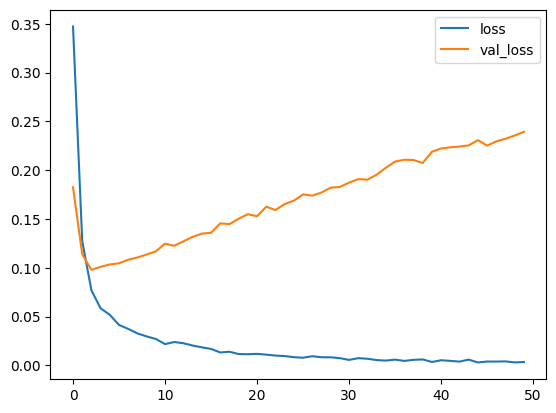

In [150]:
# plot the epoch-loss graph
import matplotlib.pyplot as plt

metrics = pd.DataFrame(history.history)
metrics.head()

metrics[['loss','val_loss']].plot()
plt.show()

The model appears to start overfitting before epoch 10 around epoch 6. 

## 8. 

Report the accuracy in the validation set for the best model. (you need to load the best model from ModelCheckpoint callback)

In [151]:
test_model = keras.models.load_model("bigram_multi.keras")
test_model.evaluate(X_train_vectorized, y_train)

122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9877 - loss: 0.0494


[0.049619320780038834, 0.986923098564148]

The accuracy is an impressive 98.7%

# Question 3: Sequence Modeling: (word embedding with masking)

## 1. 

Use the TextVectorization layer in Keras to preprocess the text data. Set the max_tokens parameter to 10,000. Set the output_sequence_length parameter to 1,000.  text_vectorization = TextVectorization( ....)

In [152]:
text_vectorization_seq = TextVectorization(max_tokens=10000, 
                                       output_sequence_length=1000,
                                       output_mode='int')

## 2. 

Fit the vectorization layer to the text data in the train set using adapt(). text_vectorization.adapt(....)

In [153]:
text_vectorization_seq.adapt(X_train)

## 3. 

vectorize the X_train and X_val with the text_vectorization you fit in the previous step. You can call them X_train_vectorized and X_val_vectorized. We need to pass this data along with the labels (y_train, y_val) to fit the model.

In [154]:
X_train_vectorized = text_vectorization_seq(X_train)
X_val_vectorized = text_vectorization_seq(X_val)

## 4.

Construct your sequence model as follows:
- Embedding layer with output_dim=128 and mask_zero=True.
- Bidrectional SimpleRNN with 16 nodes
- Drop out layer with ratio = 0.3  
- use an appropriate activation functions for the output layer
- use the correct loss function
- keep track of the accuracy metric

In [155]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(
    input_dim=10000, output_dim=128, mask_zero=True)(inputs)
x=layers.Bidirectional(layers.SimpleRNN(16))(embedded)
x=layers.Dropout(0.3)(x)
outputs=layers.Dense(1, activation='sigmoid')(x)
model=keras.Model(inputs, outputs)
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

## 5. 

Report the model.summary(). How many parameters does your model have?

In [156]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, None, 128) │  1,280,000 │ input_layer_11[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_3         │ (None, None)      │          0 │ input_layer_11[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 32)        │      4,640 │ embedding_2[0][0… │
│ (Bidirectional)     │                   │            │ not_equal_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32)        │          0 │ bidirectional_2[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 1)         │         33 │ dropout_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,284,673 (4.90 MB)

 Trainable params: 1,284,673 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

There are substiantially more params in this model than the previous with 1,284,673 params. 

## 6. 

Fit the model with 5 epochs.

In [157]:
callbacks = [keras.callbacks.ModelCheckpoint("seq_bidir_rnn_with_masking.keras",
                                             save_best_only=True, monitor="val_loss")]

history = model.fit(X_train_vectorized, y_train,
                    validation_data=(X_val_vectorized, y_val),
                    epochs=5,
                    callbacks=callbacks)

Epoch 1/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 88s 684ms/step - accuracy: 0.8722 - loss: 0.4078 - val_accuracy: 0.9803 - val_loss: 0.0855
Epoch 2/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 79s 646ms/step - accuracy: 0.9857 - loss: 0.0611 - val_accuracy: 0.9844 - val_loss: 0.0694
Epoch 3/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 78s 637ms/step - accuracy: 0.9969 - loss: 0.0191 - val_accuracy: 0.9815 - val_loss: 0.0654
Epoch 4/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 79s 648ms/step - accuracy: 0.9969 - loss: 0.0201 - val_accuracy: 0.9809 - val_loss: 0.0877
Epoch 5/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 77s 633ms/step - accuracy: 0.9987 - loss: 0.0079 - val_accuracy: 0.9761 - val_loss: 0.1309


## 7. 

Plot the epoch-loss graph and comment on that (for example, where does the model start overfitting and etc.)

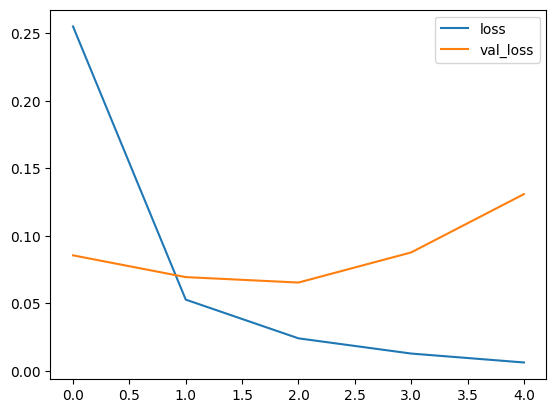

In [158]:
metrics = pd.DataFrame(history.history)
metrics.head()

metrics[['loss','val_loss']].plot()
plt.show()

Based on the above graph it appears the model is starting to overfit around the second epoch. 

## 8. 

Report the accuracy in the validation set for the best model. You need to load the best model from ModelCheckpoint callback. 

In [159]:
test_model_seq = keras.models.load_model("seq_bidir_rnn_with_masking.keras")
test_model_seq.evaluate(X_train_vectorized, y_train)

122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 172ms/step - accuracy: 0.9957 - loss: 0.0187


[0.014311254024505615, 0.9969230890274048]

The accuracy has improved from the previous model to 99.7%. 

# Question 4: Put your model to the test: Predicting Spam and Ham in Fake messages

In [167]:
a = ["Congratulations! You have been randomly selected to win a lifetime supply of jokes! Reply 'LOL' to claim your prize."]
b = ["Hey, I just wanted to let you know that I finally figured out how to make the perfect grilled cheese sandwich. It only took me 20 years and 50 failed attempts, but I did it!"]
c = ["Your package could not be delivered, click this link"]

# Display the predictions using the bag of words model
for text, name in zip([a, b, c], ["A", "B", "C"]):
    prob = test_model.predict(text_vectorization(text))[0][0]
    label = "spam" if prob >= 0.5 else "ham"
    print(f"Message {name}: Probability: {prob:.2f}, Prediction: {label}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Message A: Probability: 1.00, Prediction: spam

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Message B: Probability: 0.00, Prediction: ham

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Message C: Probability: 0.15, Prediction: ham

